Software projects vs Number of Stars

Popularity of software projects is one of the important measures of trust whereb, for example, the number of github stars indicate number of developers who "watch" them.

To model this quantity to understand what causes some projects to have more stars we collect data from WoC on 
- project ID
- the project duration,
- from date,
- number of authors, 
- number of commits,
- number of Core Developers,
- number of commits by Top Developers
- number of stars.

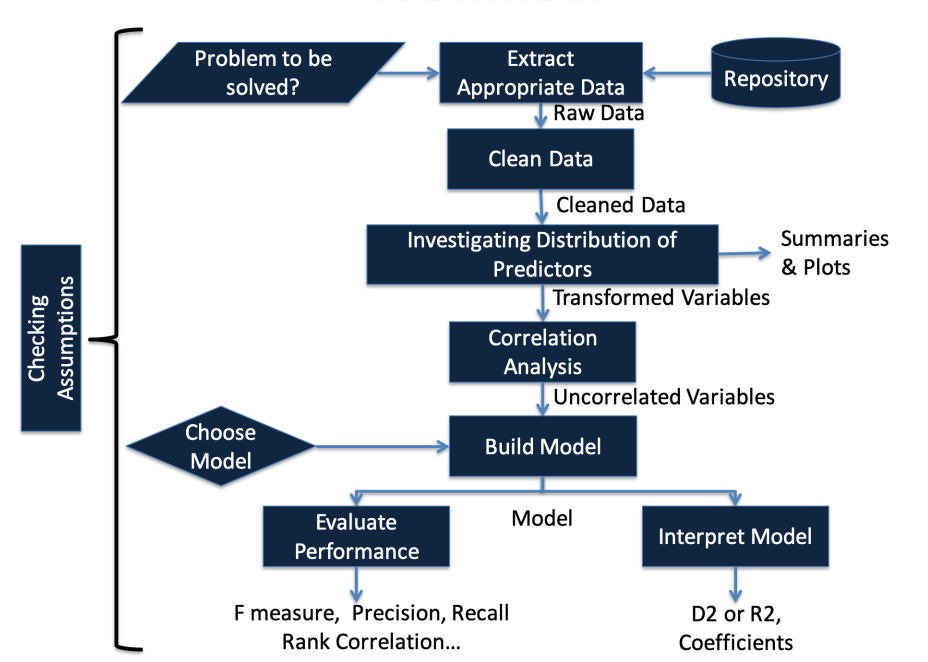


In [ ]:
#------------------------------DATA EXTRACTION------------------------------

#Read data from the file and add the name for each of the columns
library(data.table) #quick reading
x=read.table("prjSU0",sep=";",quote="",comment.char="",nrows=100000) # 100K in scope
names(x) = c("p","dur","fr","na","nc","nCore","nc1","ns")
head(x) # Health check

#ProjID, ProjDuration(sec), FromDate(sec,1970), NumAuthors, 
#NumCommits", NumCoreDevelopers", NumCommitsByTopDev, NumStar)


Health check for imported data
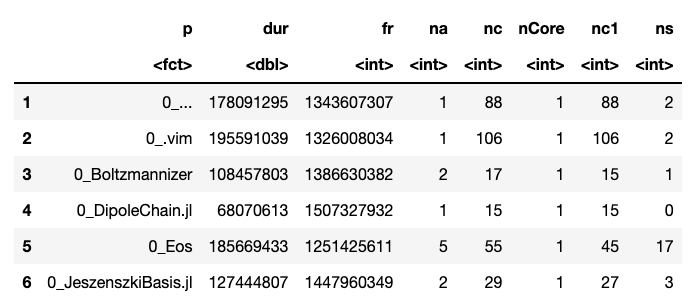

In [ ]:
#------------------------------CLEAN DATA------------------------------

# Completeness of data
colSums(is.na(x)) # check for empty fields


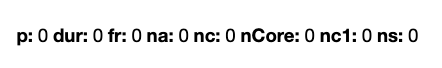

In [ ]:
#------------------------------DATA ANALYSIS------------------------------

#Initial data validation
str(x) # Variables, Types, Factor, Quantities
summary(x) # Distribution, min, max, mead vs median, Q3 vs mean


Data is not properly distributed
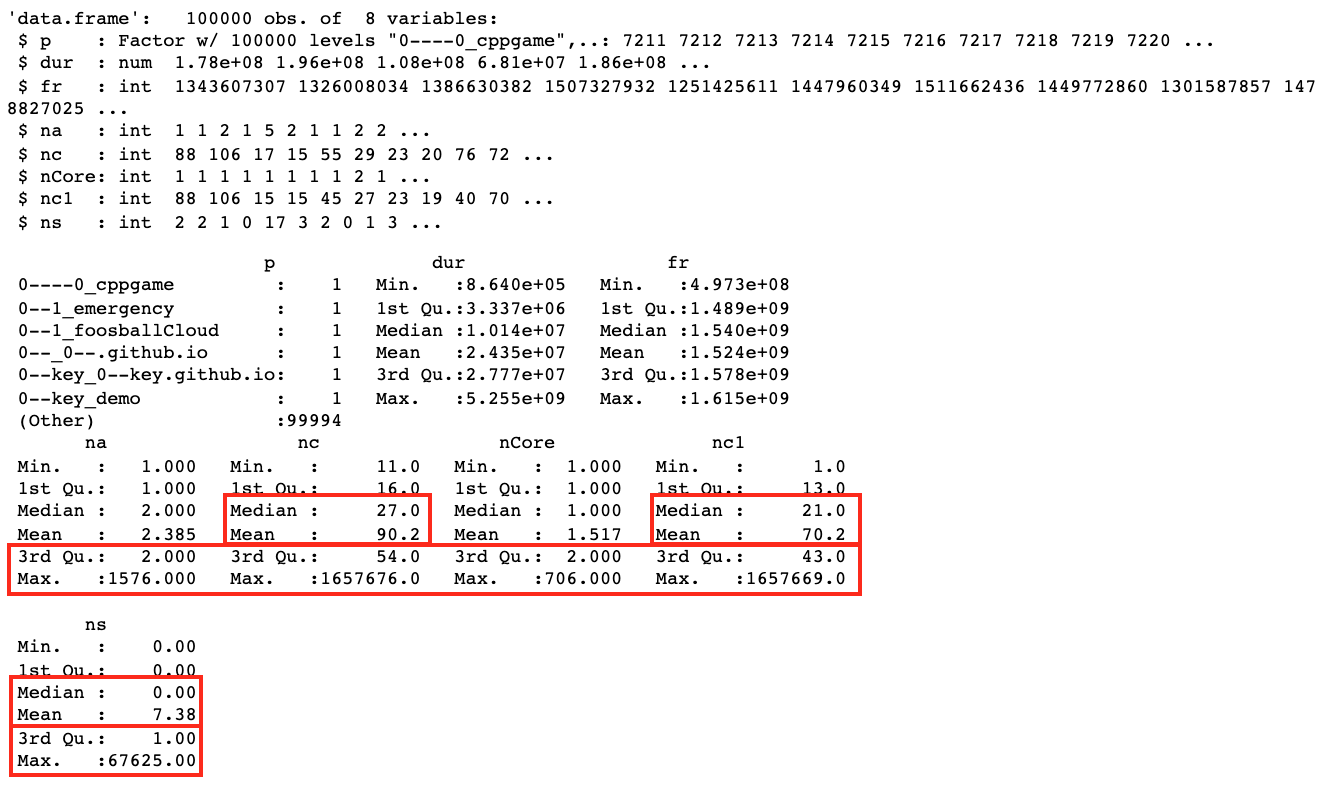

In [ ]:
#------------------------------CORRELATION ANALYSIS------------------------------

# Execute correclation analysis based on collected data and analysis results
cor( as.data.frame(x[,c("ns","dur","na","nc","nCore","nc1")]), method="spearman" ) 
#The Spearman method was chosen based on the above findings.


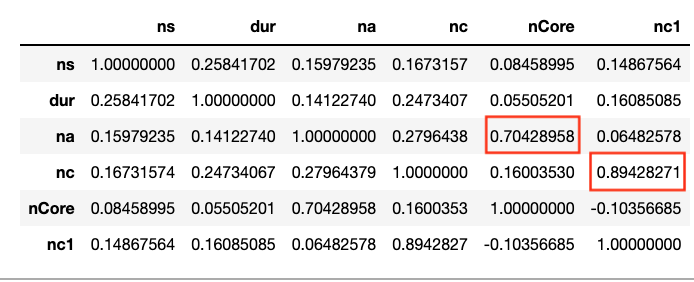

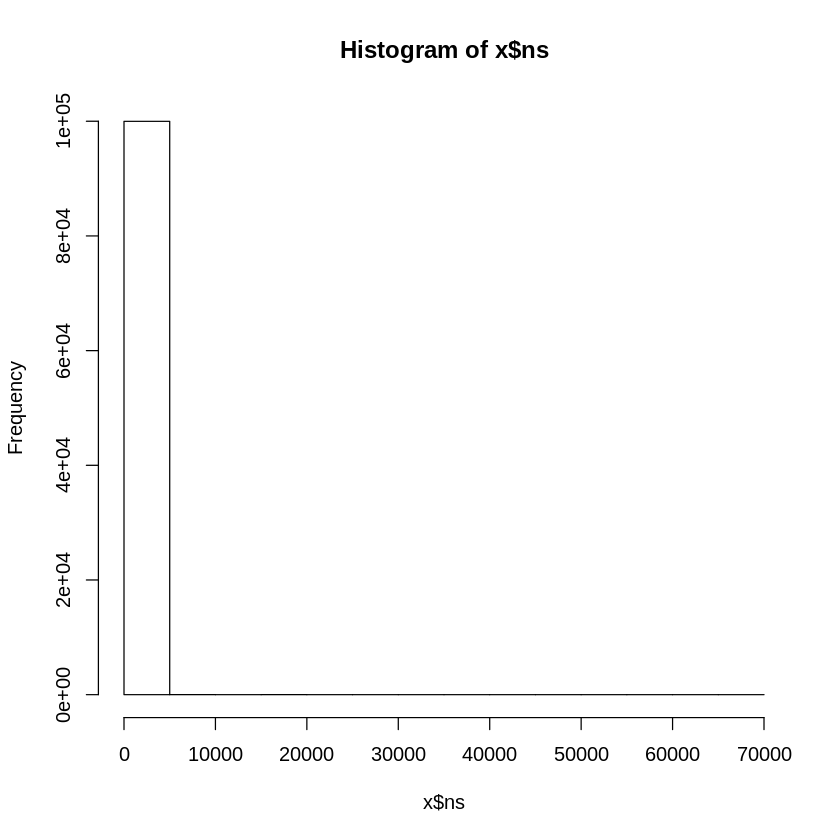

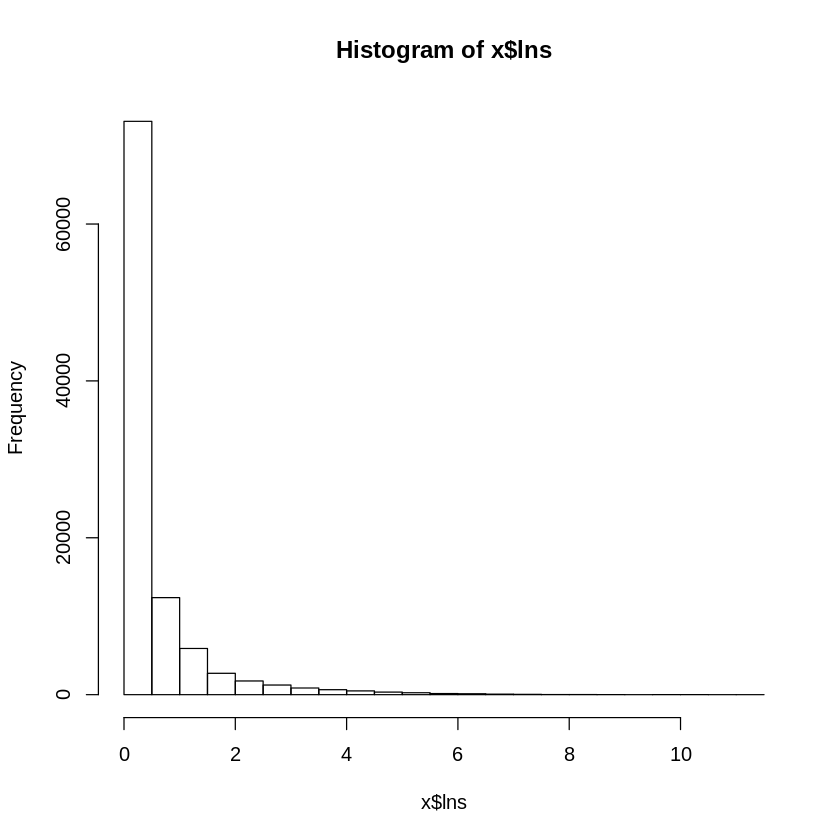

In [9]:
#------------------------------TRANSFORMATION------------------------------

#Calculate Logs
x$lns=log(x$ns+1);
x$ldur=log(x$dur+1);
x$lna=log(x$na+1);
x$lnc=log(x$nc+1);
x$lnCore=log(x$nCore+1);

# examples to see the difference
hist(x$ns)
hist(x$lns)

#Notes:
#1. Advantages: 1. narrow, 2.multiplicative model


In [11]:
#Randomly sample 100K repos

sel = sample(1:dim(x)[1],100000)

#first a smaller sample for analysis then a larger sample for matching
za=x[sel,][1:20000,]
zb=x[sel,][20000+1:100000,]


REGRESSION SELECTION

Apply applicable Regressions model based on previous results
- Simple Linear Regression (not applicable, too simple)
    lm(lns~ldur, data=za)
- Polynomial Regression (not applicable due to LOG transformation)
    lm(lns~ldur+I(ldur^2)+I(ldur^3), data=za)
- Multiple Linear Regression (most suitable)
    lm(lns~ldur+lnc+lna+lCore, data=za)
- Logistic Regression
    lm(lns~ldur+lnc+lna+lCore, family = binomial, data=za)



Call:
lm(formula = lns ~ ldur + lnc + lna + lnCore, data = za, subset = za$na > 
    0)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9146 -0.4398 -0.1993  0.1170  8.2319 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.528249   0.073618 -34.343  < 2e-16 ***
ldur         0.155330   0.004622  33.610  < 2e-16 ***
lnc          0.023202   0.007457   3.111  0.00186 ** 
lna          0.795110   0.024232  32.813  < 2e-16 ***
lnCore      -0.564442   0.035002 -16.126  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8423 on 19995 degrees of freedom
Multiple R-squared:  0.1563,	Adjusted R-squared:  0.1562 
F-statistic: 926.4 on 4 and 19995 DF,  p-value: < 2.2e-16



Call:
lm(formula = lns ~ ldur + lnc + lnCore, data = za, subset = za$na > 
    0)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3387 -0.4624 -0.2155  0.0893  8.2290 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.023167   0.073969  -40.87   <2e-16 ***
ldur         0.172936   0.004712   36.70   <2e-16 ***
lnc          0.096231   0.007306   13.17   <2e-16 ***
lnCore       0.354216   0.021565   16.43   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8646 on 19996 degrees of freedom
Multiple R-squared:  0.1109,	Adjusted R-squared:  0.1108 
F-statistic: 831.5 on 3 and 19996 DF,  p-value: < 2.2e-16


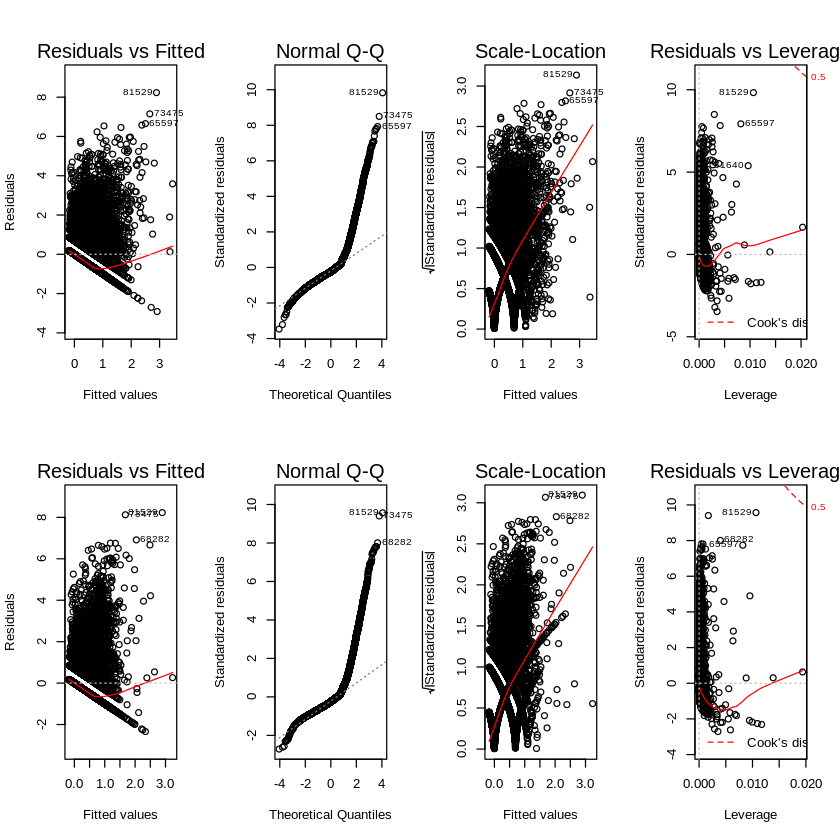

In [13]:
#-----------Linear Regression-----------

#Linear regression (least squares)
lim1=lm(lns~ldur+lnc+lna+lnCore, data=za,subs=za$na>0);
lim2=lm(lns~ldur+lnc+lnCore, data=za,subs=za$na>0);
summary(lim1)
summary(lim2)
par(mfrow=c(2,4))
plot(lim1)
plot(lim2)


#Notes
#Focus on 1. Adjusted R-squared, 2. lnCore


In [44]:
#projects with 300+ authors
lm300 = lm(lns~ldur+lnc+lna+lnCore, data=za,subs=za$na>300)
summary(lm300)

#projects with 10+ authors seem to offer good fit
lm9 = lm(lns~ldur+lnc+lna+lnCore, data=za,subs=za$na>9)
summary(lm9)

#does it change anything if we add nc1
lm8p = lm(lns~ldur+lnc+lna+lnCore+log(nc1), data=za,subs=za$na>9)
summary(lm8p)


Call:
lm(formula = lns ~ ldur + lnc + lna + lnCore, data = za, subset = za$na > 
    300)

Residuals:
ALL 4 residuals are 0: no residual degrees of freedom!

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  -55.979         NA      NA       NA
ldur           3.974         NA      NA       NA
lnc           -5.673         NA      NA       NA
lna            5.812         NA      NA       NA
lnCore            NA         NA      NA       NA

Residual standard error: NaN on 0 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:    NaN 
F-statistic:   NaN on 3 and 0 DF,  p-value: NA



Call:
lm(formula = lns ~ ldur + lnc + lna + lnCore, data = za, subset = za$na > 
    9)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4862 -1.1893 -0.3692  0.9902  5.7023 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -10.0851     1.4191  -7.107 9.13e-12 ***
ldur          0.5666     0.0812   6.978 2.01e-11 ***
lnc          -0.5189     0.1141  -4.548 7.93e-06 ***
lna           3.5521     0.3769   9.424  < 2e-16 ***
lnCore       -2.7441     0.3170  -8.658 3.32e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.922 on 292 degrees of freedom
Multiple R-squared:  0.4414,	Adjusted R-squared:  0.4337 
F-statistic: 57.68 on 4 and 292 DF,  p-value: < 2.2e-16



Call:
lm(formula = lns ~ ldur + lnc + lna + lnCore + log(nc1), data = za, 
    subset = za$na > 9)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4836 -1.2556 -0.2944  0.8687  5.8489 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -9.2530     1.4062  -6.580 2.18e-10 ***
ldur          0.5387     0.0798   6.751 7.98e-11 ***
lnc          -1.5355     0.2938  -5.227 3.29e-07 ***
lna           2.9870     0.3986   7.495 8.04e-13 ***
lnCore       -1.6227     0.4313  -3.762 0.000203 ***
log(nc1)      1.0951     0.2927   3.741 0.000220 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.88 on 291 degrees of freedom
Multiple R-squared:  0.467,	Adjusted R-squared:  0.4579 
F-statistic:    51 on 5 and 291 DF,  p-value: < 2.2e-16


-----------Results/models assessment-----------

1. ANOVA
2. Regression assessment based on each indep elem.
3. Akaike Information Criterion, AIC

In [41]:
#ANOVA - dispersion analysis (hipotezes ivertinimas)

anova(lim1, test="Chi")
anova(lim1,lim2)


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
ldur,1,1433.8379,1433.8379349,2021.2107,0.000000e+00
lnc,1,229.3272,229.3272164,323.2713,1.030992e-71
lna,1,781.0020,781.0020261,1100.9401,4.739676e-235
lnCore,1,184.4768,184.4768364,260.0479,3.898773e-58
Residuals,19995,14184.3649,0.7093956,NA,NA


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,19995,14184.36,NA,NA,NA,NA
2,19996,14948.15,-1,-763.7871,1076.673,4.761376e-230


(Intercept)        ldur         lnc         lna      lnCore 
-2.52824934  0.15533040  0.02320169  0.79510952 -0.56444186

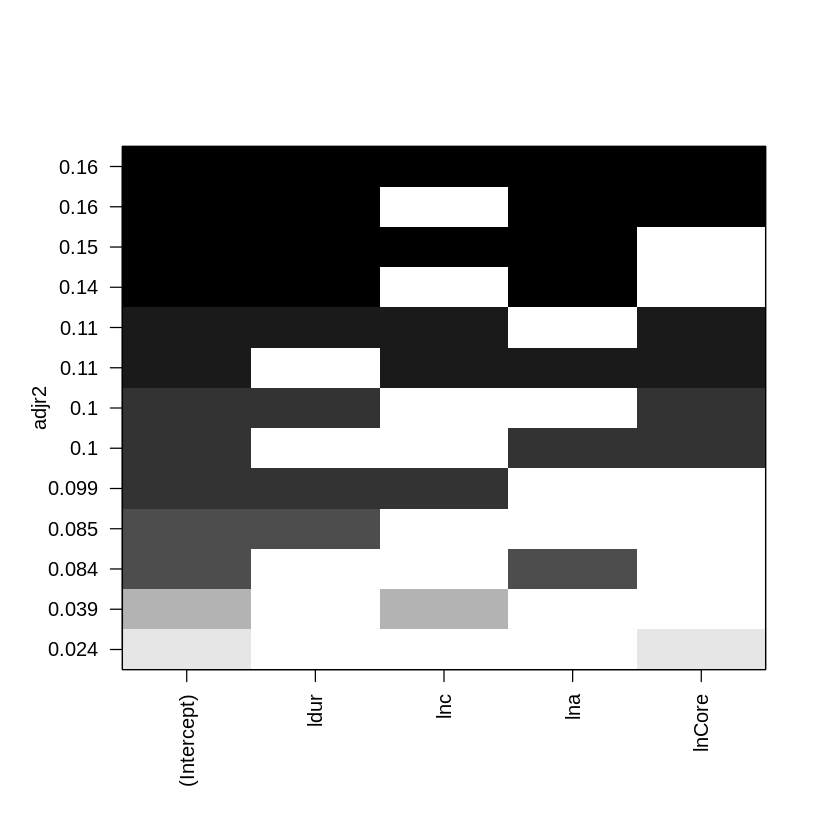

In [61]:
#Regression assessment

library(leaps)
leaps <- regsubsets(lns~ldur+lnc+lna+lnCore, data=za,subs=za$na>0, nbest=4)
# isveda n geriausiu modeliu 1 nepriklausomam kintam.
plot(leaps, scale="adjr2")

#Nepriklausomu koeficientu ivertinimas
coef(lim1) #kuo didesnis, tuo svarbesnis


In [42]:
#Akaike Information Criterion, AIC

AIC(lim1,lim2,lm300,lm9,lm8p)

Warning message in AIC.default(lim1, lim2, lm300, lm9, lm8p):
“models are not all fitted to the same number of observations”


,df,AIC
,<dbl>,<dbl>
lim1,6,49897.702
lim2,5,50944.649
lm300,5,-Inf
lm9,6,1237.791
lm8p,7,1456.775


In [63]:
#classificator, predicted
zpz=predict(lim1,zb)

#confusion table, actual classification
table(zpz>log(1),log(zb$ns+1)>log(1))
#table uses the cross-classifying factors to build a contingency table of the counts at each combination of factor levels.


       
        FALSE  TRUE
  FALSE  7713  1496
  TRUE  50741 20050